# Import Dependencies

In [3]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [4]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [5]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [6]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=363f097f19cb97b414c974ec3166c407


In [8]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [9]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [10]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-73.72567819847298 -171.73398160394603
-74.02039564685992 -121.54302436607357
42.9795607045391 56.96299260905087
33.57012945131861 134.20956880932596
29.92804334717499 167.39612915704623
46.591767754566746 105.33141695518111
14.41329628882282 -65.82661561135764
-73.45313414927358 109.29260693128498
44.0434629955318 67.38284824594368
-25.655743114032717 173.28359807572758
-60.31307819335122 -43.66257669969602
86.2307726652752 -88.86884187641672
47.689818620285166 32.82334166849887
-6.816241308662285 127.62292826543325
-0.3873032750637577 -109.75864927526698
-30.403404810672882 95.5824282195639
2.742992986601763 140.6540745080951
-80.53015144846847 -89.54457337706847
45.345185515423566 75.17264221375288
53.00283611141188 -31.445932651947572
-68.19998576638524 143.46859918092264
-75.79216990839018 175.54324126955333
-40.25727231262196 -81.87879600040502
85.59751956335279 135.60922721433656
62.32565218912197 -19.084532913909754
-32.77125458145064 -91.76252464546467
25.855771002449657 -82.4

51.46679632159393 79.16724483422394
34.23028799711035 -101.18191473598466
-46.98958014916039 47.42897510855269
24.951102340232865 -53.20720583224055
75.06134295174692 -98.99252590003496
28.641614311563856 76.31437108930686
-76.74816995032135 95.27254655198522
50.38222323213628 166.845412898858
42.749834491825084 139.73428775144015
51.609511765200665 114.22675882118199
78.97492701964768 -175.83635780441818
-25.643132131951162 171.8824452177867
-37.12988856360707 -13.093746080235036
-14.991673006878088 38.73524730337775
-39.02049558555133 66.83958592947823
39.182826914975806 -130.56649369742146
-59.160972535598916 -62.24557269282647
-88.70466671485539 179.7337040677545
16.31568364166705 -135.23217331178833
21.44507418698855 118.48330596773803
-60.106734521414836 -172.4512684243584
54.51298687910548 164.47669659166075
-62.32692703594732 -0.09805283725293634
-80.1677330015865 151.93315939975952
-21.747318248311046 142.016821585557
46.79955488433484 161.75034869328653
42.83613397404039 5.24

In [11]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

579

# 6.2.6: Get the City Weather Data

In [14]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | vaini
Processing Record 2 of Set 1 | rikitea
Processing Record 3 of Set 1 | akdepe
Processing Record 4 of Set 1 | muroto
Processing Record 5 of Set 1 | severo-kurilsk
Processing Record 6 of Set 1 | mandalgovi
Processing Record 7 of Set 1 | rincon
Processing Record 8 of Set 1 | albany
Processing Record 9 of Set 1 | zhanakorgan
Processing Record 10 of Set 1 | vao
Processing Record 11 of Set 1 | ushuaia
Processing Record 12 of Set 1 | qaanaaq
Processing Record 13 of Set 1 | kazanka
Processing Record 14 of Set 1 | ambon
Processing Record 15 of Set 1 | puerto ayora
Processing Record 16 of Set 1 | carnarvon
Processing Record 17 of Set 1 | vanimo
Processing Record 18 of Set 1 | punta arenas
Processing Record 19 of Set 1 | balkhash
Processing Record 20 of Set 1 | tasiilaq
Processing Record 21 of Set 1 | hobart
Processing Record 22 of Set 1 | kaitangata
Processing Record 23 of Set 1 | ancud
Processing Rec

Processing Record 40 of Set 4 | fuyang
Processing Record 41 of Set 4 | haines junction
Processing Record 42 of Set 4 | nikolskoye
Processing Record 43 of Set 4 | kathmandu
Processing Record 44 of Set 4 | wahran
City not found. Skipping...
Processing Record 45 of Set 4 | qasigiannguit
Processing Record 46 of Set 4 | kodiak
Processing Record 47 of Set 4 | wagar
Processing Record 48 of Set 4 | voloshka
Processing Record 49 of Set 4 | atka
City not found. Skipping...
Processing Record 50 of Set 4 | coahuayana
Processing Record 1 of Set 5 | ixtapa
Processing Record 2 of Set 5 | saint george
Processing Record 3 of Set 5 | porto novo
Processing Record 4 of Set 5 | kavaratti
Processing Record 5 of Set 5 | san jose
Processing Record 6 of Set 5 | alofi
Processing Record 7 of Set 5 | iquique
Processing Record 8 of Set 5 | palu
Processing Record 9 of Set 5 | karakendzha
City not found. Skipping...
Processing Record 10 of Set 5 | fortuna
Processing Record 11 of Set 5 | bom jesus do itabapoana
Proce

Processing Record 29 of Set 8 | lasa
Processing Record 30 of Set 8 | fethiye
Processing Record 31 of Set 8 | henties bay
Processing Record 32 of Set 8 | diamantino
Processing Record 33 of Set 8 | atambua
Processing Record 34 of Set 8 | sungaipenuh
Processing Record 35 of Set 8 | dunedin
Processing Record 36 of Set 8 | staryy nadym
Processing Record 37 of Set 8 | iquitos
Processing Record 38 of Set 8 | utinga
Processing Record 39 of Set 8 | rexburg
Processing Record 40 of Set 8 | villazon
Processing Record 41 of Set 8 | yangcun
Processing Record 42 of Set 8 | hervey bay
Processing Record 43 of Set 8 | ulladulla
Processing Record 44 of Set 8 | palmer
Processing Record 45 of Set 8 | hunchun
Processing Record 46 of Set 8 | doha
Processing Record 47 of Set 8 | bethel
Processing Record 48 of Set 8 | coxim
Processing Record 49 of Set 8 | padang
Processing Record 50 of Set 8 | cozumel
Processing Record 1 of Set 9 | linkou
Processing Record 2 of Set 9 | sobolevo
Processing Record 3 of Set 9 | c

Processing Record 19 of Set 12 | port moresby
Processing Record 20 of Set 12 | enshi
Processing Record 21 of Set 12 | warqla
City not found. Skipping...
Processing Record 22 of Set 12 | jiwani
Processing Record 23 of Set 12 | ostrovnoy
Processing Record 24 of Set 12 | saquena
Processing Record 25 of Set 12 | magadan
Processing Record 26 of Set 12 | los andes
Processing Record 27 of Set 12 | kanye
Processing Record 28 of Set 12 | lakes entrance
Processing Record 29 of Set 12 | severka
-----------------------------
Data Retrieval Complete      
-----------------------------


In [15]:
len(city_data)

534

# 6.2.7: Create a Dataframe of City Weather Data

In [16]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Vaini,-21.2000,-175.2000,73.92,72,100,12.50,TO,2022-07-27 00:52:37
1,Rikitea,-23.1203,-134.9692,75.04,73,55,8.88,PF,2022-07-27 00:52:37
2,Akdepe,42.0551,59.3788,75.29,39,0,1.01,TM,2022-07-27 00:52:38
3,Muroto,33.2833,134.1500,81.91,81,88,7.29,JP,2022-07-27 00:52:38
4,Severo-Kurilsk,50.6789,156.1250,55.02,82,100,6.42,RU,2022-07-27 00:52:38
5,Mandalgovi,45.7625,106.2708,57.45,59,0,11.83,MN,2022-07-27 00:52:39
6,Rincon,32.2960,-81.2354,84.16,65,40,10.36,US,2022-07-27 00:52:39
7,Albany,42.6001,-73.9662,67.89,72,0,4.36,US,2022-07-27 00:48:55
8,Zhanakorgan,43.9098,67.2495,76.19,42,0,10.67,KZ,2022-07-27 00:52:40
9,Vao,-22.6667,167.4833,68.67,64,0,8.88,NC,2022-07-27 00:52:40


In [17]:
# Rearrange Column Order
city_data_df= city_data_df [["City", "Country", "Date","Lat", "Lng","Max Temp","Humidity", "Cloudiness", "Wind Speed"]]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Vaini,TO,2022-07-27 00:52:37,-21.2000,-175.2000,73.92,72,100,12.50
1,Rikitea,PF,2022-07-27 00:52:37,-23.1203,-134.9692,75.04,73,55,8.88
2,Akdepe,TM,2022-07-27 00:52:38,42.0551,59.3788,75.29,39,0,1.01
3,Muroto,JP,2022-07-27 00:52:38,33.2833,134.1500,81.91,81,88,7.29
4,Severo-Kurilsk,RU,2022-07-27 00:52:38,50.6789,156.1250,55.02,82,100,6.42
5,Mandalgovi,MN,2022-07-27 00:52:39,45.7625,106.2708,57.45,59,0,11.83
6,Rincon,US,2022-07-27 00:52:39,32.2960,-81.2354,84.16,65,40,10.36
7,Albany,US,2022-07-27 00:48:55,42.6001,-73.9662,67.89,72,0,4.36
8,Zhanakorgan,KZ,2022-07-27 00:52:40,43.9098,67.2495,76.19,42,0,10.67
9,Vao,NC,2022-07-27 00:52:40,-22.6667,167.4833,68.67,64,0,8.88


In [18]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

# 6.2.8 Plot Latitude vs Temperature

In [22]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [23]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1658884004.472734

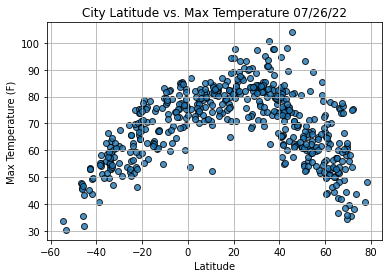

In [24]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

# 6.3.2 Plot Latitude vs. Humidity

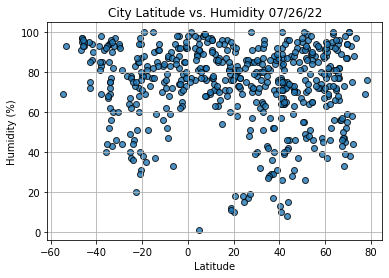

In [26]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

# 6.3.3 Plot Latitude vs Cloudiness

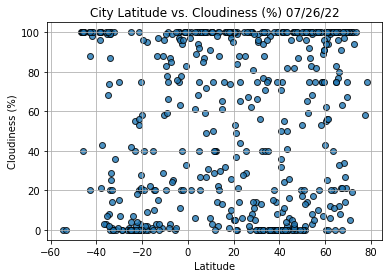

In [27]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

# 6.3.4 Plot Latitude vs. Wind Speed

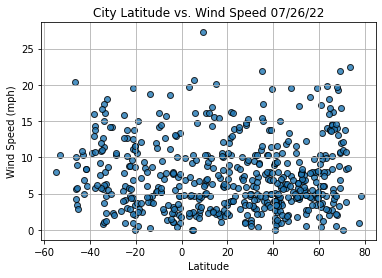

In [28]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

# 6.4.2 Find the Correlation Between Latitude and Maximum Temperature

In [30]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

# Create Hemisphere Dataframes

In [31]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

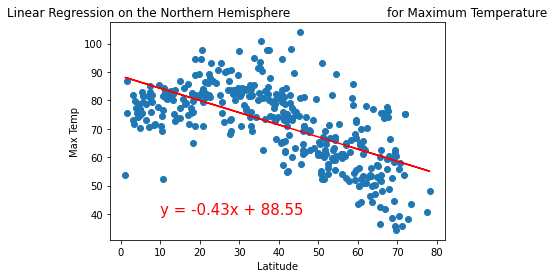

In [32]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

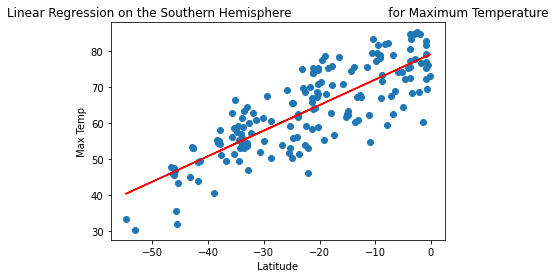

In [33]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

# 6.4.3 Find the Correlation Between Latitude and Percent Humidity

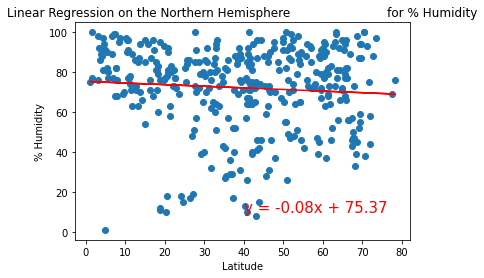

In [43]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

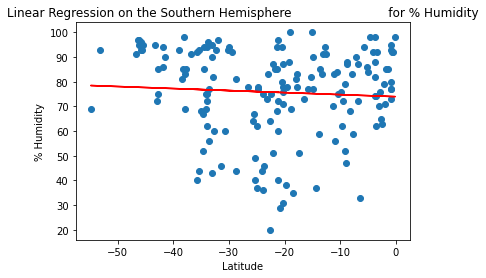

In [44]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

# 6.4.4 Find the Correlation Between Latitude and Percent Cloudiness

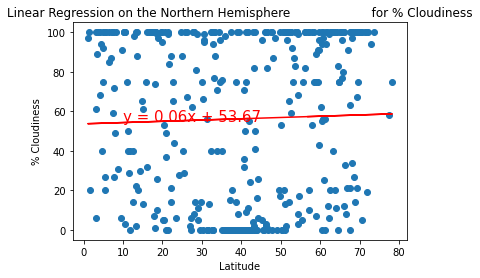

In [46]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function
plot_linear_regression(x_values, y_values,
                   'Linear Regression on the Northern Hemisphere \
                    for % Cloudiness', '% Cloudiness',(10,55))

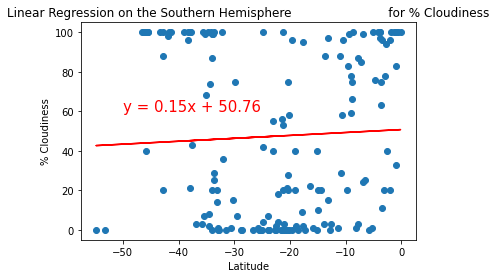

In [47]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

# 6.4.5 Find the Correlation Between Latitude and Wind Speed

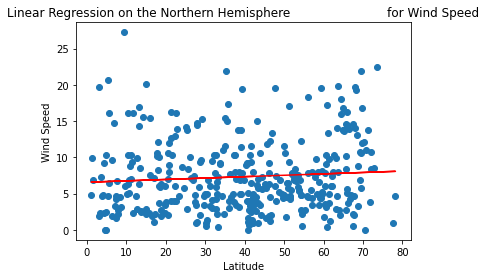

In [48]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

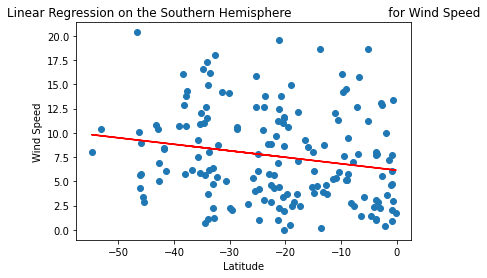

In [49]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))

# 6.5.2 Create Heatmaps for Weather Parameters